# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 4 - Asunciones Regresión Lineal**
---

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.



El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 

Recordamos que estas asunciones son:

- Normalidad (ya la deberíais haber evaluado)
- Homogeneidad de varianzas
- Independencia de las variables
  
Cada asunción la deberéis testar de forma visual y analítica.

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import seaborn as sns
import matplotlib.pyplot as plt

# Estadísticos
# ============
import researchpy as rp
from itertools import combinations
from scipy.stats import levene
import statsmodels.api as sm
from scipy import stats

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('once')

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (6,6)
pd.options.display.max_columns = None 

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
country,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,112.887108,0.611,2.834056,91.749,24.9,15.4,4.8
Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


1. Normalidad: se calcula sobre la variable respuesta 
   - Analíticas: Shapiro o Kolmogorov-Smirnov
   - Gráficas: histplot, displot, qqplot

Usamos el test de Shapiro porque la muestra es muy pequeña, tan solo 66 registros.

In [4]:
# usamos el test de Shapiro.
stats.shapiro(df['restaurant_price_index'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270884139463305)

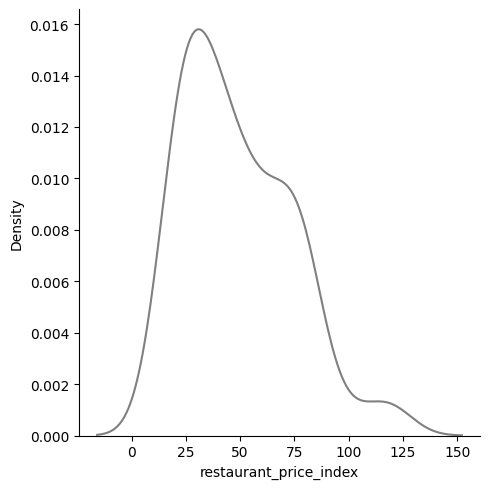

In [5]:
# visualizamos la densidad de la variable respuesta
sns.displot(df['restaurant_price_index'], kind='kde', color = "grey");

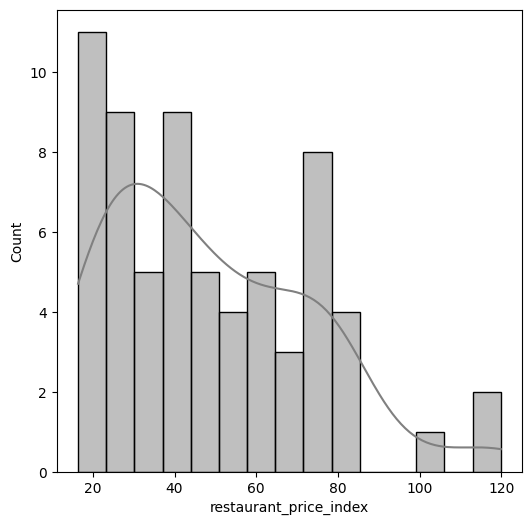

In [6]:
# visualizamos la distribución de los datos con un histograma de la variable respuesta
sns.histplot(df['restaurant_price_index'], kde = True, color = "grey", bins=15);

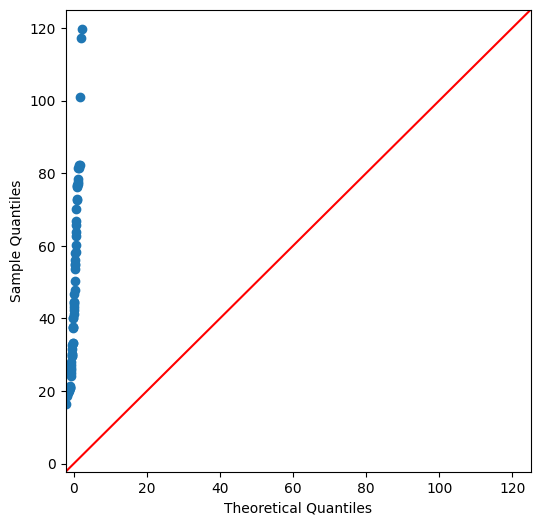

In [7]:
# con un qqplot
sm.qqplot(df['restaurant_price_index'], line ='45');

Como vemos no es normal. En el histplot y distplot se ve que no se ajusta a la campana de Gauss. En el qqplot se ve que los datos no se ajustan a la línea. En el test de Saphiro nos dale p-value < 0,05. Todo ello indica que los datos no se ajustan a una distribución normal. No podríamos hacer una regresión lineal sin normalizarla.

2. Independencia de las variables: se calcula sobre las variables predictoras
   - Analíticas: Chi_square

En un proyecto real no analizaríamos la independencia ya que los datos de la variable respuesta no se ajusta a una distribución normal pero siendo un ejercicio lo realizamos para aplicar las herramientas aprendidas. Aunque solo tenemos una variable categórica como tenemos muchas variables en total y la Cramer's V es un parámetro muy robusto para analizar las relaciones entre las variables hemos decidido realizar este análisis con el método combinations() que nos permite analizar rápidamente todas las combianciones de variables y obtener los datos en varios formatos, según lo que nos resulte más amigable. En este caso printeamos los resultados del crosstab y guardamos las Cramer's V en un diccionario.

In [8]:
# creamos las combinaciones de predictoras
predictoras = df.select_dtypes(include=np.number).drop(columns='restaurant_price_index')
combinaciones = list(combinations(predictoras, 2))
print(combinaciones[0:5])

[('population_2017', 'employment_agriculture'), ('population_2017', 'employment_industry'), ('population_2017', 'employment_services'), ('population_2017', 'education'), ('population_2017', 'quality_of_life_index')]


In [9]:
# ahora evaluaremos la independencia entre las combinaciones de nuestras columnas: 
cramers_v = {}
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df[i[0]], df[i[1]],
                                                    test= 'chi-square',
                                                    expected_freqs= True,
                                                    prop= 'cell')
   
    print(f'INDEPENDENCIA ENTRE {i[0], i[1]} \n', test_results)
    print('-------------------------------------------------------')
    cramers_v[f'{i[0]}_{i[1]}'] = test_results.iloc[2,1]


INDEPENDENCIA ENTRE ('population_2017', 'employment_agriculture') 
                    Chi-square test    results
0  Pearson Chi-square ( 3640.0) =   3696.0000
1                       p-value =      0.2544
2                    Cramer's V =      1.0000
-------------------------------------------------------
INDEPENDENCIA ENTRE ('population_2017', 'employment_industry') 
                    Chi-square test    results
0  Pearson Chi-square ( 3510.0) =   3564.0000
1                       p-value =      0.2581
2                    Cramer's V =      1.0000
-------------------------------------------------------
INDEPENDENCIA ENTRE ('population_2017', 'employment_services') 
                    Chi-square test    results
0  Pearson Chi-square ( 3770.0) =   3828.0000
1                       p-value =      0.2507
2                    Cramer's V =      1.0000
-------------------------------------------------------
INDEPENDENCIA ENTRE ('population_2017', 'education') 
                    Chi-squa

In [10]:
# sacamos los resultados guardados en el diccionario
cramers_v

{'population_2017_employment_agriculture': 1.0,
 'population_2017_employment_industry': 1.0,
 'population_2017_employment_services': 1.0,
 'population_2017_education': 1.0,
 'population_2017_quality_of_life_index': 1.0,
 'population_2017_purchasing_power_index': 1.0,
 'population_2017_safety_index': 1.0,
 'population_2017_cost_of_living': 1.0,
 'population_2017_consumer_price_index': 1.0,
 'population_2017_human_capital_index': 1.0,
 'population_2017_inflation': 1.0,
 'population_2017_urban_population': 1.0,
 'population_2017_population_age_distribution_0_14': 1.0,
 'population_2017_population_age_distribution_60_plus': 1.0,
 'population_2017_international_migrant_stock': 1.0,
 'employment_agriculture_employment_industry': 0.9271,
 'employment_agriculture_employment_services': 0.952,
 'employment_agriculture_education': 0.9442,
 'employment_agriculture_quality_of_life_index': 1.0,
 'employment_agriculture_purchasing_power_index': 1.0,
 'employment_agriculture_safety_index': 0.991,
 'em

Como vemos todas las variables predictoras son dependientes así que no podríamos hacer una regresión lineal

3. Homogeneidad u homocedasticidad de varianzas: se calcula sobre las variables predictoras:
   - Analíticas: Levene (datos no normales)
                 Bartlett (datos normales)
   - Gráficas: violinplot, boxplot

Para realizar el ejercicio, dado que no tenemos una distribución normal utilizamos el test de Levene, que es más recomendable cuando no tenemos la seguridad de que los datos sean normales. No obstante, En un proyecto real no analizaríamos la homocedasticidad una vez obtenidos los resultados de normalidad e independencia.

COLUMNAS NUMÉRICAS

In [11]:
# analiticamente analizamos las columnas numéricas
result_levene_num = {}

for col in predictoras:
      statistic, p_val = levene(df[col], df.restaurant_price_index, center='median')
      result_levene_num[col] = p_val 
result_levene_num  

{'population_2017': 0.006865476366096122,
 'employment_agriculture': 7.792524851174642e-08,
 'employment_industry': 5.123716977352301e-13,
 'employment_services': 5.5857269550645916e-06,
 'education': 0.0006151103029989481,
 'quality_of_life_index': 0.001069993595461225,
 'purchasing_power_index': 0.04278871347359312,
 'safety_index': 4.063776528729857e-05,
 'cost_of_living': 0.22408338907573289,
 'consumer_price_index': 0.7268549022984792,
 'human_capital_index': 1.9612778841920467e-19,
 'inflation': 3.0770697327909217e-16,
 'urban_population': 0.00880379121076484,
 'population_age_distribution_0_14': 5.072143432461885e-13,
 'population_age_distribution_60_plus': 1.1223998480548118e-10,
 'international_migrant_stock': 9.28418619222132e-05}

Tan solo tenemos dos columnas numéricas con valores homocedásticos (p-val > 0,05): 'cost_of_living': 0.22408338907573289 y 'consumer_price_index': 0.7268549022984792. Todas las demás tienen valores heterocedásticos.  

In [ ]:
# gráficamente sacamos los regplot para sacar la relación entre las columnas numéricas y la variable respuesta
fig, axes = plt.subplots(4, 4, figsize = (30, 10))
axes = axes.flat
predictoras = predictoras.columns

for i, col in enumerate(predictoras): 
        sns.regplot(data = df, x = col, y = 'restaurant_price_index', line_kws = {"color": "black", "alpha": 0.7 }, ax = axes[i])
        axes[i].set_title(col, fontsize = 15, fontweight = "bold")
        axes[i].tick_params(labelsize = 20)
        axes[i].set_xlabel("")

fig.tight_layout();

Aunque en la gráficas no se ve tan claro podemos concluir que efectivamente tan solo son homocedásticos los datos de las columnas 'cost_of_living' y 'consumer_price_index', que son los que mejor se ajustan y son más simétricos respecto a la línea

COLUMNAS CATEGÓRICAS

En cuanto a las columnas categóricas, como ya indicamos anteriormente tenemos tan solo 66 filas y hay 66 elementos únicos en la columna "country", razón por la que la metimos en el índice y no la consideramos en el análisis de las variables categóricas. Por lo tanto la úncia variable categórica que tenemos es la columna 'region'. Para realizar el test de Levene en una columna categórica necesitamos crear un dataframe filtrando los registros de cada catagoría (14 dataframes en este caso). Iteramos para obtenerlos de forma rápida y los guardamos en un diccionario.

In [13]:
# analiticamente para la columna 'region' obtenemos un diccionario para guardar los dataframes de cada categoría de la columna
dicc = {}
for cat in df.region.unique():
    df_cat = df[df['region'] == cat]['restaurant_price_index']
    dicc[cat] = df_cat
dicc.keys() # mostramos las keys del diccionario con los resultados 

dict_keys(['SouthAmerica', 'Oceania', 'WesternEurope', 'EasternEurope', 'SouthernEurope', 'NorthernAmerica', 'EasternAsia', 'WesternAsia', 'NorthernEurope', 'NorthernAfrica', 'SouthernAsia', 'South-easternAsia', 'CentralAmerica', 'SouthernAfrica'])

In [14]:
# aplicamos el test de levene con los 14 dataframes generados (uno por categoría)
levene_test_cat = stats.levene(dicc['SouthAmerica'], dicc['Oceania'], dicc['WesternEurope'], dicc['EasternEurope'], dicc['SouthernEurope'], dicc['NorthernAmerica'], 
                            dicc['EasternAsia'], dicc['WesternAsia'], dicc['NorthernEurope'], dicc['NorthernAfrica'], dicc['SouthernAsia'], dicc['South-easternAsia'], 
                            dicc['CentralAmerica'], dicc['SouthernAfrica'], center='median')
levene_test_cat

LeveneResult(statistic=1.0255039536430455, pvalue=0.4422592622902402)

Según el test de Levene la columna categórica 'region' es homocedástica (p-value > 0,05). No obstante, no deberíamos haber realizado este test porque no cumplimos las asunciones de normalidad e independencia. Además, tenemos 14 regiones diferentes y, como se puede ver a continuación, varias de ellas tienen únicamente 1 o 2 registros, siendo 9 el número máximo de registros por categoría, lo cual es claramente un valor muy pequeño que puede tener como consecuencia que el test estadístico pueda fallar.   

In [17]:
#sacamos los valores de la columna 'region'
df['region'].value_counts()

EasternEurope        9
SouthernEurope       9
WesternAsia          8
NorthernEurope       8
WesternEurope        6
South-easternAsia    6
SouthAmerica         5
EasternAsia          4
SouthernAsia         4
Oceania              2
NorthernAmerica      2
NorthernAfrica       1
CentralAmerica       1
SouthernAfrica       1
Name: region, dtype: int64

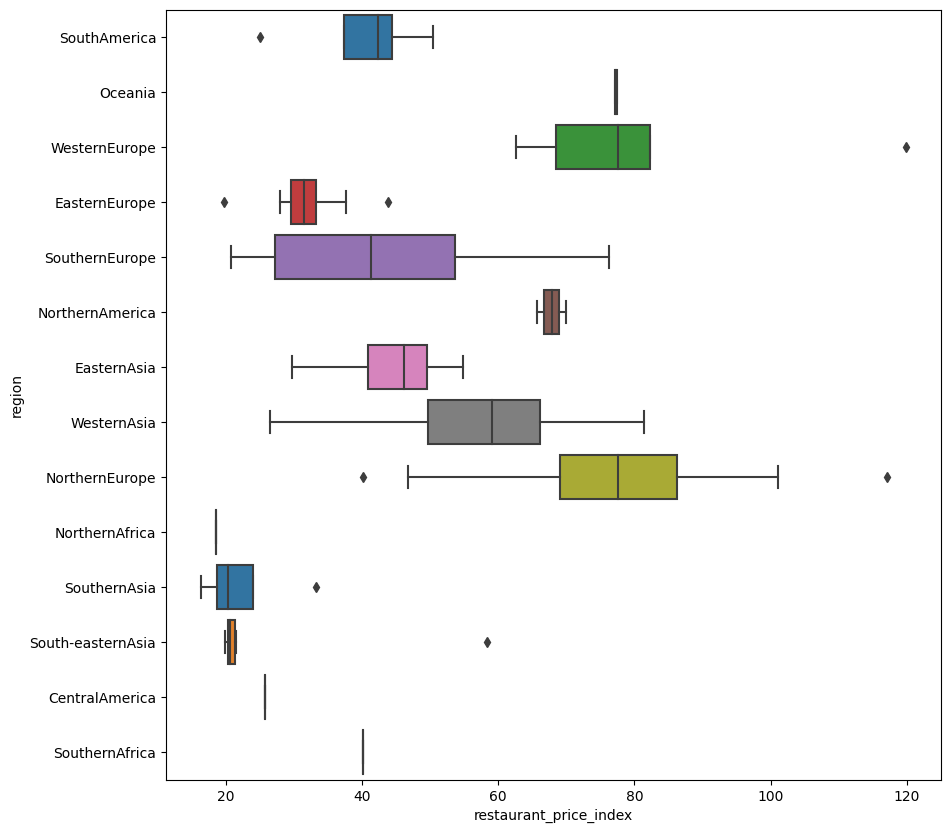

In [16]:
# gráficamente realizamos el análisis para la columna categórica utilizamos los boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(y= 'region', x= 'restaurant_price_index', data = df, palette = 'tab10');

En la gráfica se ve claramente que la columna 'region' no es homocedástica: las medianas no coinciden en absoluto y también hay mucha variación en los rangos de los valores típicos (longitud entre bigotes). Por ello, como habíamos adelantado, no deberíamos darle valor al resultado analítico obtenido en este caso, ya que las condiciones en las que lo hemos realizado no son las adecuadas para este tipo de test.